In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.metrics import (root_mean_squared_error,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             r2_score)
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor




In [36]:
df = pd.read_csv(r'C:\Users\georg\Desktop\Bstorm Visual studio code\01 - Python_Full_Course\07_Machine_learning\Exercice ML-DM\4. california_housing\data\original_data.csv')
df = df.dropna()
df = df[df['median_house_value']<500001]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19475 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19475 non-null  float64
 1   latitude            19475 non-null  float64
 2   housing_median_age  19475 non-null  float64
 3   total_rooms         19475 non-null  float64
 4   total_bedrooms      19475 non-null  float64
 5   population          19475 non-null  float64
 6   households          19475 non-null  float64
 7   median_income       19475 non-null  float64
 8   median_house_value  19475 non-null  float64
 9   ocean_proximity     19475 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


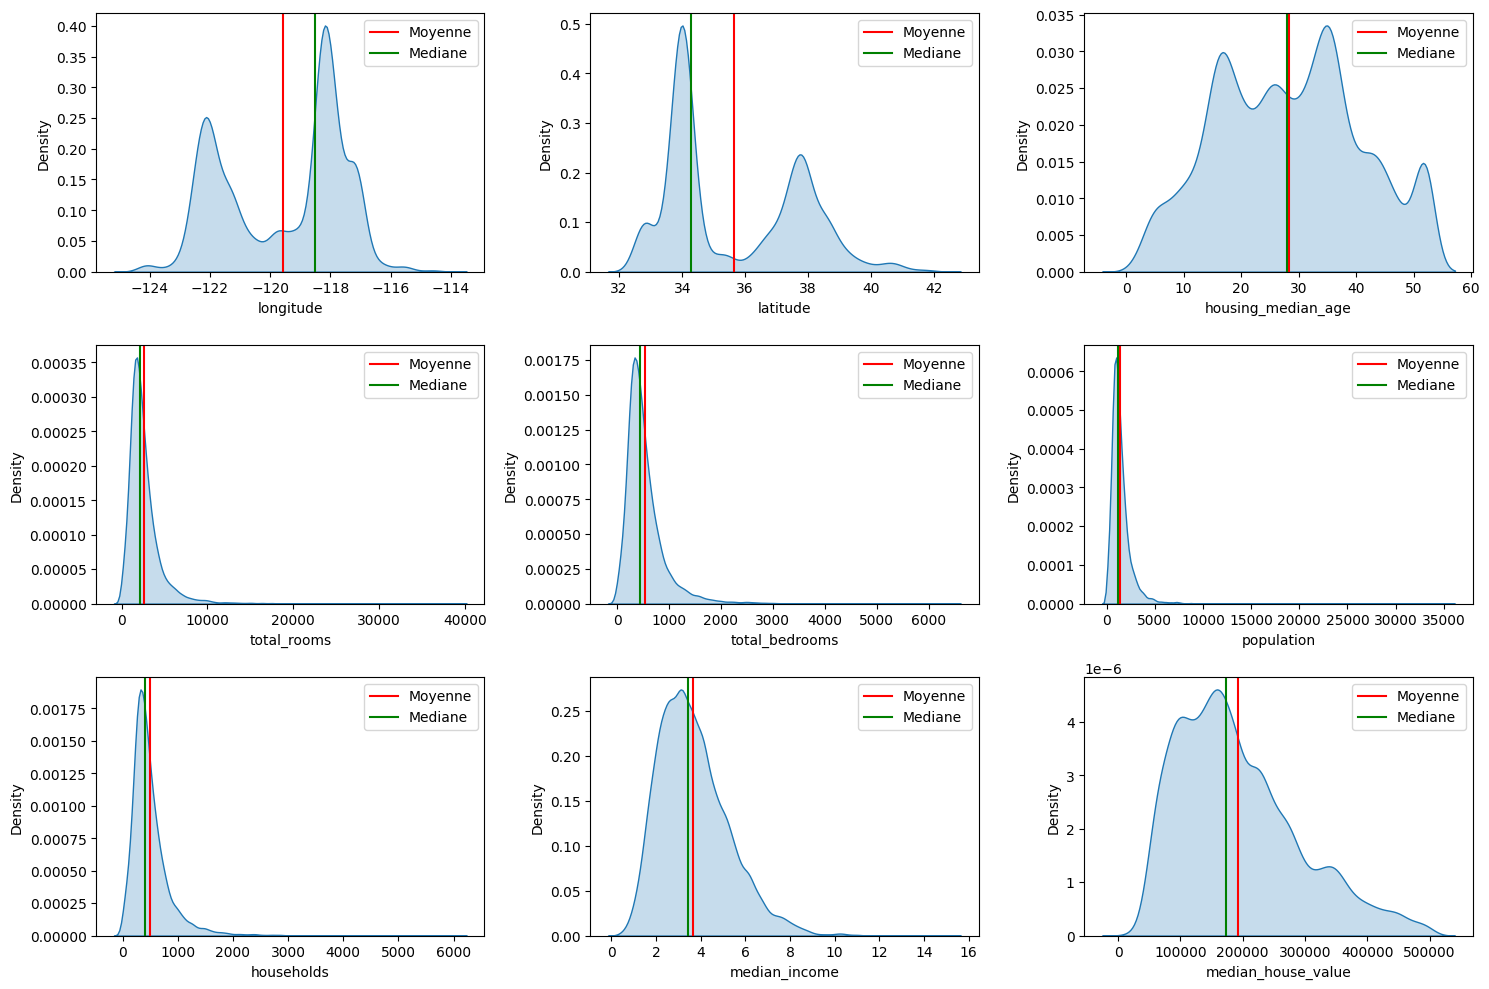

In [38]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes('float').columns):
    
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df,x=col,fill=True)
    plt.axvline(x=df[col].mean(),c="red",label='Moyenne')
    plt.axvline(x=df[col].median(),c="green",label='Mediane')
    plt.legend()

plt.tight_layout()
plt.show()

c:\Users\georg\anaconda3\envs\Condaenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\georg\AppData\Local\Temp\ipykernel_29088\147564738.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=np.log1p(df[col]),fill=True)
c:\Users\georg\anaconda3\envs\Condaenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\georg\anaconda3\envs\Condaenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


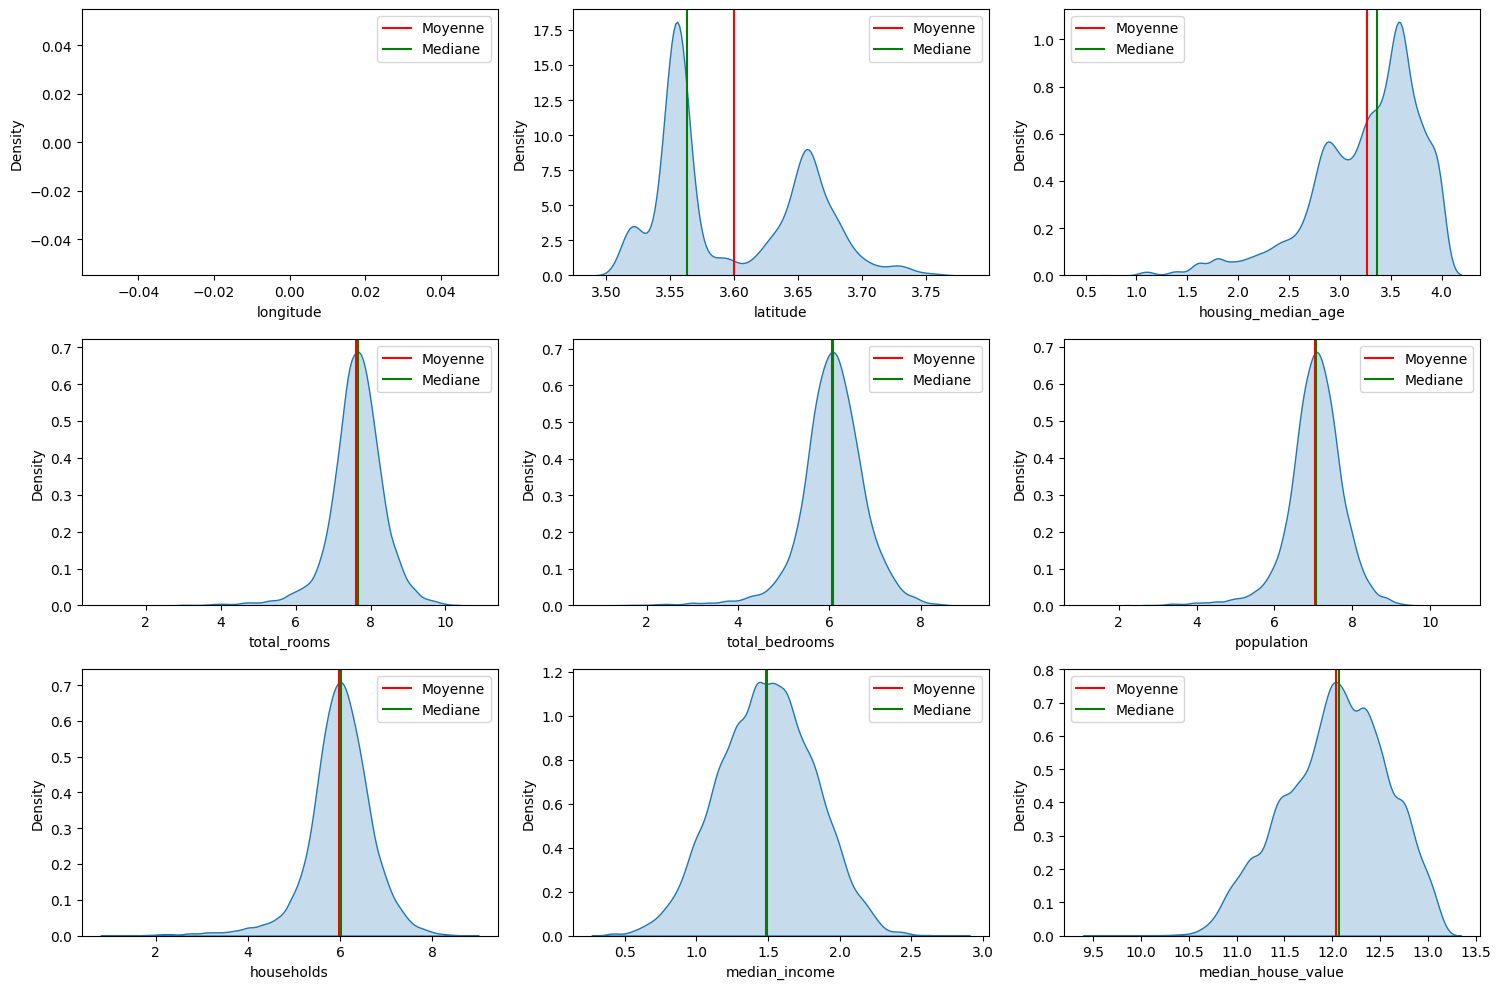

In [39]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes('float').columns):

    plt.subplot(3,3,i+1)
    sns.kdeplot(x=np.log1p(df[col]),fill=True)
    plt.axvline(x=np.log1p(df[col]).mean(),c="red",label='Moyenne')
    plt.axvline(x=np.log1p(df[col]).median(),c="green",label='Mediane')
    plt.legend()

plt.tight_layout()
plt.show()

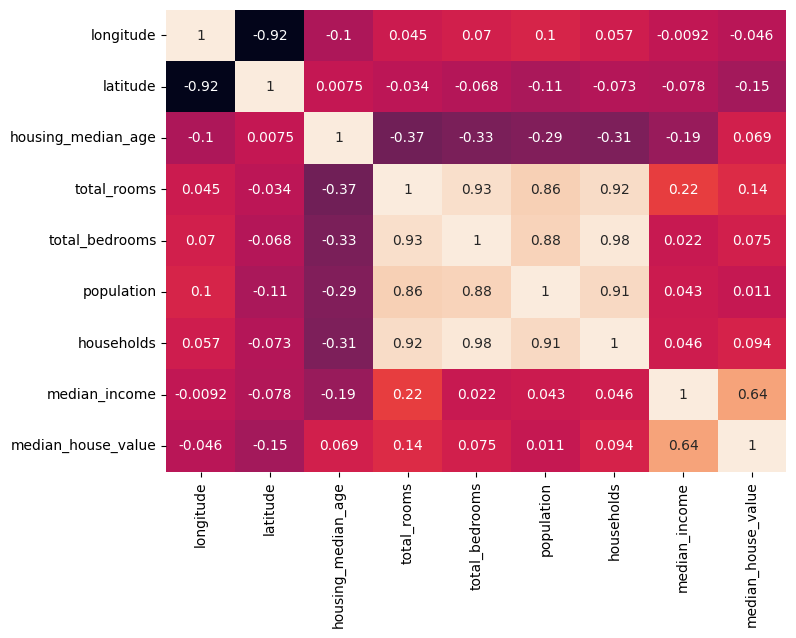

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),cbar=False,annot=True)
plt.show()


In [41]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [65]:
pca_col = ['total_rooms','total_bedrooms','population','households']
log_col = ['housing_median_age','median_income']

pca_pipe = Pipeline([('log',FunctionTransformer(np.log1p,feature_names_out='one-to-one')),
                     ('pca',PCA(n_components=2))])

enc_pipe = Pipeline([('encoder',OneHotEncoder(drop='first'))])

log_pipe = Pipeline([('log_rest',FunctionTransformer(np.log1p,feature_names_out='one-to-one'))])

preprocessor = ColumnTransformer([('t_pca',pca_pipe,pca_col),
                                 ('t_enc',enc_pipe,['ocean_proximity']),
                                 ('t_log',log_pipe,log_col)],
                                 remainder='passthrough')

model = TransformedTargetRegressor(regressor=Pipeline([('transformer',preprocessor),
                                                       ('model',RandomForestRegressor(random_state=42))]),
                                    transformer=FunctionTransformer(func=np.log1p,inverse_func=np.expm1))

In [45]:
model

TransformedTargetRegressor(regressor=Pipeline(steps=[('transformer',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('t_pca',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'log1p'>)),
                                                                                                       ('pca',
                                                                                                        PCA(n_components=2))]),
                                                                                       ['total_rooms',
                                                                                        'total_bedrooms',
                                                                                        'population',
                                                                                        'households']),
                                                                                      ('t_enc',
                                                                                       Pipeline(steps=[('encoder',
                                                                                                        OneHotEncoder(drop='first'))]),
                                                                                       ['ocean_proximity']),
                                                                                      ('t_log',
                                                                                       Pipeline(steps=[('log_rest',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'log1p'>))]),
                                                                                       ['housing_median_age',
                                                                                        'median_income'])])),
                                                     ('model',
                                                      HistGradientBoostingRegressor())]),
                           transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                           inverse_func=<ufunc 'expm1'>))

In [67]:
model.get_params()

{'check_inverse': True,
 'func': None,
 'inverse_func': None,
 'regressor__memory': None,
 'regressor__steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('t_pca',
                                    Pipeline(steps=[('log',
                                                     FunctionTransformer(feature_names_out='one-to-one',
                                                                         func=<ufunc 'log1p'>)),
                                                    ('pca', PCA(n_components=2))]),
                                    ['total_rooms', 'total_bedrooms', 'population',
                                     'households']),
                                   ('t_enc',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first'))]),
                                    ['ocean_proximity']),
                                   ('t_log',
 

In [66]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f' RMSE : {root_mean_squared_error(y_test,y_pred)}')
print(f' MAE : {mean_absolute_error(y_test,y_pred)}')
print(f' R2 : {r2_score(y_test,y_pred)}')

 RMSE : 43154.96680363031
 MAE : 27970.58173109172
 R2 : 0.8077090177273935
